In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('datasets/olympics_dataset.csv')
data

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [4]:
data.describe()

,player_id,Year
count,2.525650e+05,252565.000000
mean,2.305499e+05,1981.743908
std,4.289330e+05,32.596548
min,0.000000e+00,1896.000000
25%,5.713700e+04,1960.000000
50%,1.356110e+05,1988.000000
75%,2.118590e+05,2008.000000
max,9.460001e+06,2024.000000


In [5]:
data.head(5)

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [8]:
data.Year.unique()

In [9]:
data.Season.unique()

array(['Summer'], dtype=object)

In [13]:
data.City.value_counts().idxmax()

'Tokyo'

In [12]:
data.Sport.value_counts()

Sport
Athletics                     43294
Gymnastics                    26707
Swimming                      26416
Shooting                      12580
Rowing                        11625
                              ...  
Alpinism                          4
Cycling Road, Triathlon           2
Basque Pelota                     2
Aeronautics                       1
3x3 Basketball, Basketball        1
Name: count, Length: 76, dtype: int64

In [15]:
data.columns

Index(['player_id', 'Name', 'Sex', 'Team', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Medal'],
      dtype='object')

In [16]:
data['Event'].value_counts().idxmax()

"Football Men's Football"

In [19]:
data['City'][data['Medal']=='Gold'].max()

'Tokyo'

In [21]:
olympics_medal = data[data['Medal'] != 'No medal']
olympics_medal

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Aaltonen,M,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Aaltonen,M,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...
252551,4979564,Quincy Wilson,M,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,4980004,van Anne,F,Netherlands,NED,2024,Summer,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [23]:
team_city = data.groupby('Team')['City'].value_counts().reset_index(name="count")
team_city .dropna(inplace=True)
team_city

,Team,City,count
0,30. Februar,Helsinki,2
1,A North American Team,Paris,4
2,AIN,Paris,46
3,Acipactli,Tokyo,3
4,Acturus,London,2
...,...,...,...
4209,Zimbabwe,London,9
4210,Zimbabwe,Paris,7
4211,Zimbabwe,Amsterdam,2
4212,Zut,London,3


C:\Users\kajal.bajpayi\AppData\Local\Temp\ipykernel_17684\254668315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.values, y=team_counts.index, palette='coolwarm')


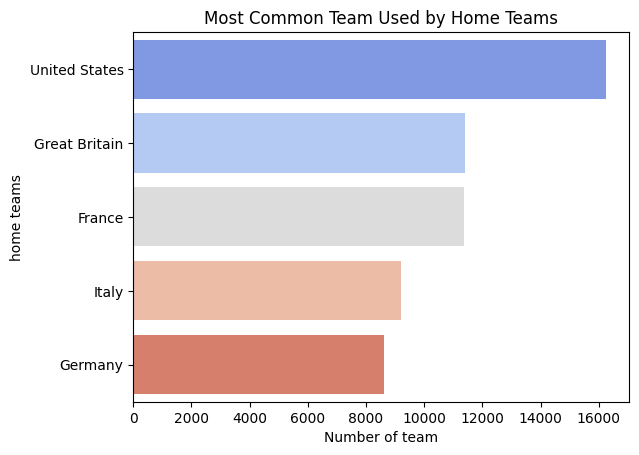

In [24]:
team_counts = data['Team'].value_counts().head()
sns.barplot(x=team_counts.values, y=team_counts.index, palette='coolwarm')
plt.title('Most Common Team Used by Home Teams')
plt.xlabel('Number of team')
plt.ylabel('home teams')
plt.show()


C:\Users\kajal.bajpayi\AppData\Local\Temp\ipykernel_17684\2969296082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sports_counts.values, y=sports_counts.index, palette='viridis')


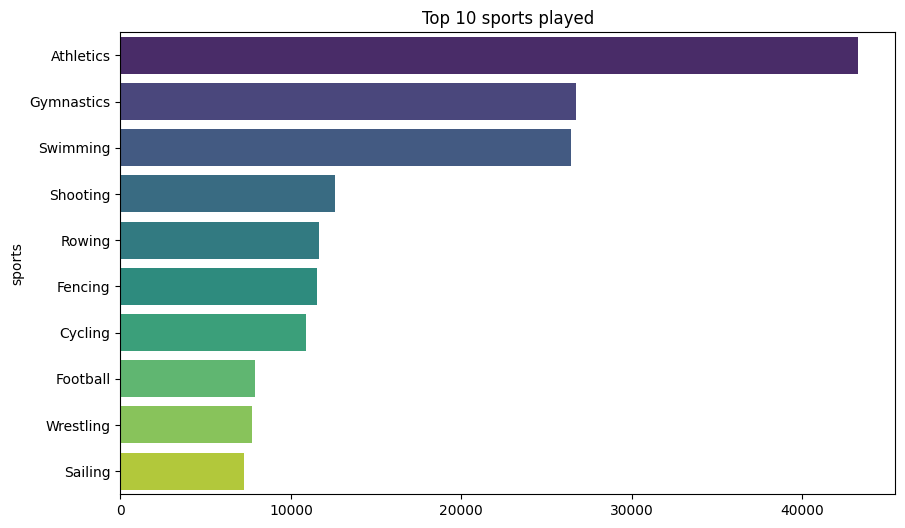

In [25]:
sports_counts = data['Sport'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sports_counts.values, y=sports_counts.index, palette='viridis')
plt.title('Top 10 sports played')
plt.xlabel('')
plt.ylabel('sports')
plt.show()

In [27]:
top10=data['Name'].value_counts().head(10)
top10

Name
John Jr.               76
Robert Mckenzie        58
William Jr.            50
Gustaf Carlberg        49
Heikki Savolainen      39
Joseph Stoffel         38
Jos Garca              36
Ioannis Theofilakis    36
Takashi Ono            33
Jean Jacoby            32
Name: count, dtype: int64

In [30]:
top_athlete = top10.idxmax()
top_medals = top10.max()

C:\Users\kajal.bajpayi\AppData\Local\Temp\ipykernel_17684\2564582234.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top10.index, rotation=45, ha='right')


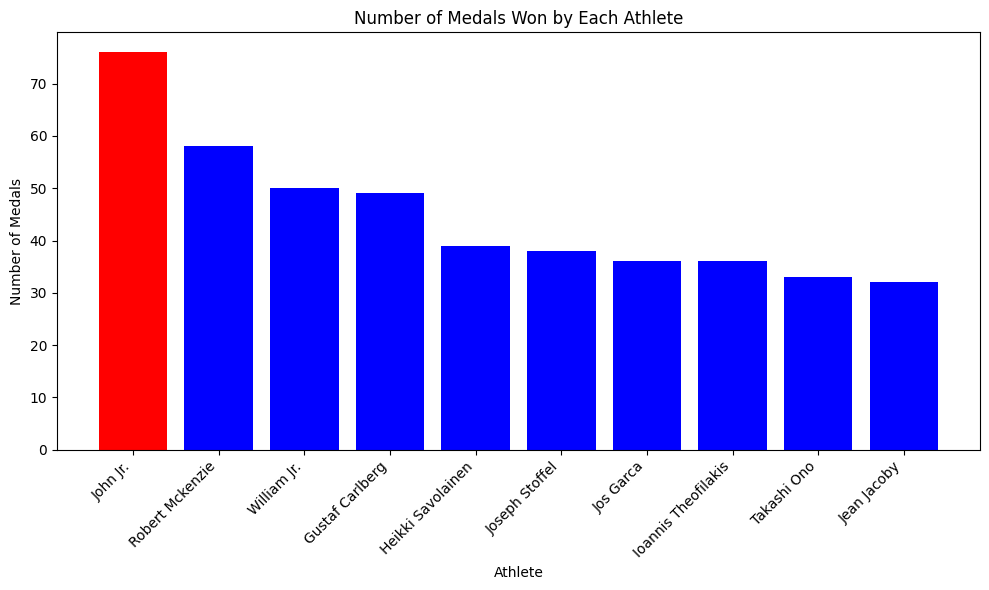

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top10.index, top10.values, color='blue')
ax.bar(top_athlete, top_medals, color='red')
ax.set_xlabel('Athlete')
ax.set_ylabel('Number of Medals')
ax.set_title('Number of Medals Won by Each Athlete')
ax.set_xticklabels(top10.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

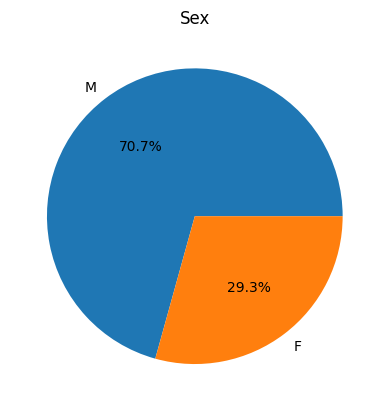

In [32]:
sex=data['Sex'].value_counts()
sex.plot.pie(autopct='%1.1f%%')
plt.title('Sex')
plt.ylabel('')
plt.show()

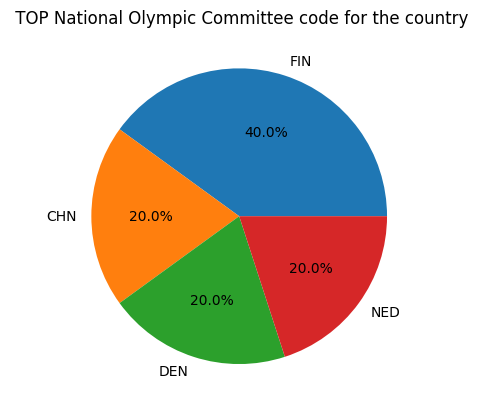

In [34]:
NOC = data['NOC'].head(10).value_counts()
NOC.plot.pie(autopct='%1.1f%%')
plt.title(' TOP National Olympic Committee code for the country')
plt.ylabel('')
plt.show()

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

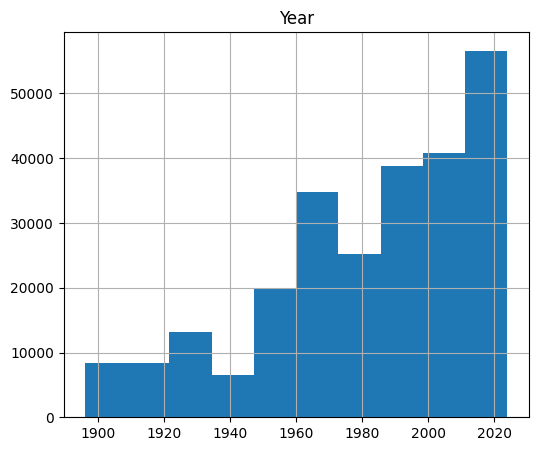

In [36]:
hist_data = data[['Year']]
hist_data.hist(figsize=(6,5))

In [38]:
medal_count = data.groupby(['City','Medal']).size().unstack(fill_value = 0)
medal_count

Medal,Bronze,Gold,No medal,Silver
City,,,,
Amsterdam,250,245,4258,239
Antwerpen,367,493,2984,448
Athina,860,883,12954,859
Atlanta,629,608,11938,605
Barcelona,604,559,11265,549
Beijing,710,671,11554,667
Berlin,295,312,5589,310
Helsinki,300,306,7373,291
London,1214,1215,18802,1195


In [40]:
top10_medal = medal_count.head(10)
top10_medal

Medal,Bronze,Gold,No medal,Silver
City,,,,
Amsterdam,250,245,4258,239
Antwerpen,367,493,2984,448
Athina,860,883,12954,859
Atlanta,629,608,11938,605
Barcelona,604,559,11265,549
Beijing,710,671,11554,667
Berlin,295,312,5589,310
Helsinki,300,306,7373,291
London,1214,1215,18802,1195
